In [1]:
from RSData import *
from HaiYangData import *
import glob

In [2]:

hyfiles = glob.glob(r'G:\remote_sensing_data\hy2b\ALT\2019\07\*.nc')
hyfiles = hyfiles[0:28]
hy_value = ['swh_ku','mean_sea_surface','sig0_ku']

hy_alt = HaiYangData(satellite='hy', sensor='alt',resolution=25000)
hy_ori_df = pd.DataFrame(np.column_stack((hy_alt.alt_from_nc_files(hyfiles, value=hy_value))), columns=['lon', 'lat', 'time']+hy_value)

# 删除无效点,只处理北纬66°以上的数据
hy_fill_value = 32767
hy_ori_df = hy_ori_df.drop(list(np.where(hy_ori_df['swh_ku'] == hy_fill_value)[0][:]))
hy_ori_df = hy_alt.data_filter(hy_ori_df,'lat',66)


In [3]:
# 将WGS 84坐标（4326）转化为极射投影
crs = CRS.from_epsg(4326)
crs = CRS.from_string("epsg:4326")
crs = CRS.from_proj4("+proj=latlon")
crs = CRS.from_user_input(4326)
crs2 = CRS(proj="aeqd")

transformer = HaiYangData.set_transformer(crs,crs2)
transformer_back = HaiYangData.set_transformer(crs2,crs)

In [4]:
# 将投影数据添加到原始dataframe中
hy_alt.add_proj(hy_ori_df, transformer)

# 交叉点平均化
mean_grid = hy_alt.coincident_point_mean(hy_ori_df,'mean_sea_surface')

# 获得XYmgrid
hy_x_map, hy_y_map = hy_alt.get_map_grid(transformer_back)

<ipython-input-5-6443bf5b7242>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  hy_m.pcolormesh(hy_x_map, hy_y_map, data=mean_grid, cmap=plt.cm.jet,vmin=0, vmax=15,latlon = True)


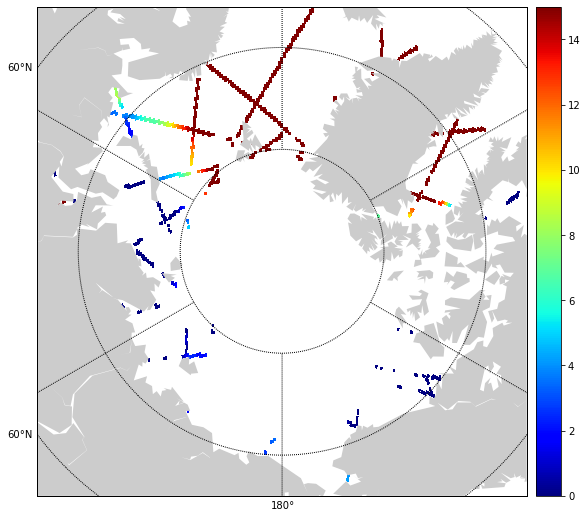

In [5]:
plt.figure(figsize=(16, 9))
hy_m = Basemap(projection='npaeqd', boundinglat=66, lon_0=180, resolution='c')
hy_m.pcolormesh(hy_x_map, hy_y_map, data=mean_grid, cmap=plt.cm.jet,vmin=0, vmax=15,latlon = True)
hy_m.colorbar(location='right')
hy_m.fillcontinents()
hy_m.drawmapboundary()
hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
# plt.title("HY2B SWH  "+ year+ month)
plt.show()
plt.close()

In [7]:
hy_ori_df.head()

,lon,lat,time,swh_ku,mean_sea_surface,sig0_ku,projlats,projlons
1823,235.019173,67.394568,6.152573e+08,10.758,2.147484e+09,15.04,-3.695475e+06,1.081078e+07
1824,234.951667,67.446971,6.152573e+08,1.030,2.147484e+09,14.70,-3.683980e+06,1.081390e+07
1840,231.291721,69.962427,6.152574e+08,0.250,-8.773200e+00,15.42,-3.122205e+06,1.094814e+07
1841,231.203591,70.015914,6.152574e+08,0.877,-8.814800e+00,16.03,-3.110030e+06,1.095065e+07
1842,231.131931,70.059185,6.152574e+08,0.695,-8.786800e+00,15.83,-3.100172e+06,1.095268e+07


## 测试极射投影

In [11]:
RE = 6378.273
E2 = 0.006693883
PI = 3.141592654
E  = np.sqrt(E2)

In [53]:
lon1 = (hy_ori_df.lon + 45) * PI / 180 
lat1 = abs(hy_ori_df.lat) * PI / 180

xy = polor_projection(lat1.iloc[0],lon1.iloc[0])

aaa


In [54]:
lat1.iloc[0]

1.176257109712797

In [52]:
def polor_projection(latitude,longitude):
    xy = np.zeros(shape=(2,))
    if abs(latitude) < PI/2:
        print('aaa')
        SL = 70 * PI / 180
        T  = np.tan(PI/4 - latitude/2) / ((1- E*np.sin(latitude)) / (1+ E*np.sin(latitude)))**(E/2)      
        TC = np.tan(PI/4 - SL/2)  / ((1 - E*np.sin(SL)) / (1 + E*np.sin(SL)))**(E/2)
        MC = np.cos(SL) / np.sqrt(1.0 - E2*(np.sin(SL)**2))
        RHO = RE * MC * T / TC
        
        xy[1] = -RHO  * np.cos(longitude)
        xy[0] =  RHO  * np.sin(longitude)
    return xy

In [55]:
x=xy[0]
y = xy[1]

In [56]:
i = int(( x + 3850 - 12.5/2.0) / 12.5) + 1
k = int(( y + 5350 - 12.5/2.0) / 12.5) + 1  
j = 896 - k +1  

In [57]:
i

113

In [58]:
j

504

In [ ]:
if (i <= m) and (j <= n) and (i >= 1) and (j >= 1):
    num[i-1,j-1] = num[i-1,j-1] + 1          
    lat[i-1,j-1] = lat[i-1,j-1] + lat_a
    lon[i-1,j-1] = lon[i-1,j-1] + lon_a
